
Pricing Simulation Results:

   Price  Buyers  Revenue  Profit
0    499    3976  1984024  688824
1    699    2294  1603506  644706
2    899    1004   902596  201796
3   1099     657   722043   90643


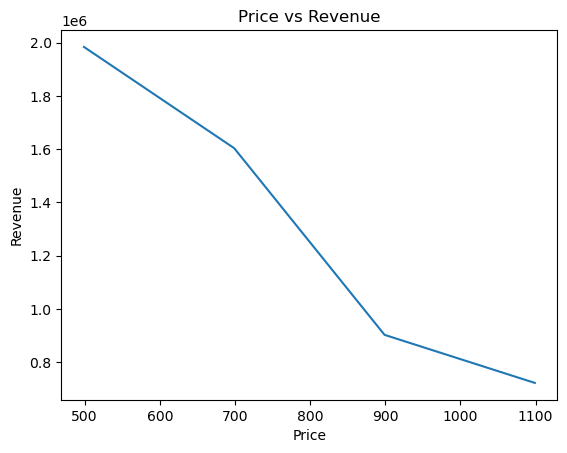

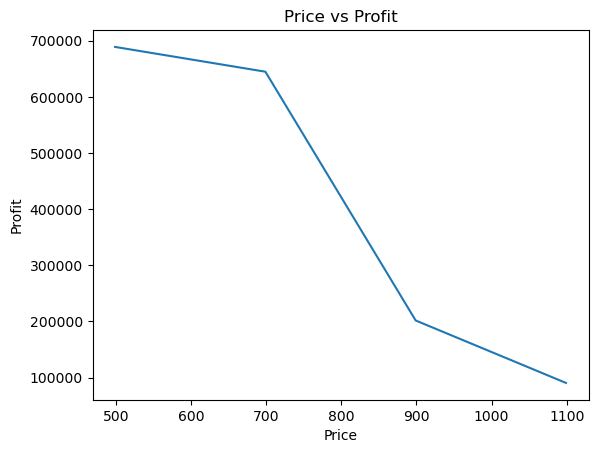


Sensitivity Analysis: Demand drops by 10%

Price: 499 | Adjusted Profit: 569822
Price: 699 | Adjusted Profit: 529936
Price: 899 | Adjusted Profit: 131197
Price: 1099 | Adjusted Profit: 31309


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# -----------------------------
# STEP 1: Generate Customer Base
# -----------------------------

n_customers = 5000

segments = np.random.choice(
    ["Sensitive", "Moderate", "Premium"],
    size=n_customers,
    p=[0.4, 0.4, 0.2]
)

wtp = []

for seg in segments:
    if seg == "Sensitive":
        wtp.append(np.random.uniform(400, 600))
    elif seg == "Moderate":
        wtp.append(np.random.uniform(600, 900))
    else:
        wtp.append(np.random.uniform(900, 1500))

data = pd.DataFrame({
    "Segment": segments,
    "WTP": wtp
})

# -----------------------------
# STEP 2: Pricing Scenarios
# -----------------------------

price_points = [499, 699, 899, 1099]

results = []

variable_cost = 200
fixed_cost = 500000

for price in price_points:
    
    # Customers buy if WTP >= price
    buyers = (data["WTP"] >= price).sum()
    
    revenue = buyers * price
    total_variable_cost = buyers * variable_cost
    profit = revenue - total_variable_cost - fixed_cost
    
    results.append([price, buyers, revenue, profit])

results_df = pd.DataFrame(
    results,
    columns=["Price", "Buyers", "Revenue", "Profit"]
)

print("\nPricing Simulation Results:\n")
print(results_df)

# -----------------------------
# STEP 3: Visualization
# -----------------------------

plt.figure()
plt.plot(results_df["Price"], results_df["Revenue"])
plt.xlabel("Price")
plt.ylabel("Revenue")
plt.title("Price vs Revenue")
plt.show()

plt.figure()
plt.plot(results_df["Price"], results_df["Profit"])
plt.xlabel("Price")
plt.ylabel("Profit")
plt.title("Price vs Profit")
plt.show()

# -----------------------------
# STEP 4: Sensitivity Analysis
# -----------------------------

print("\nSensitivity Analysis: Demand drops by 10%\n")

for price in price_points:
    
    buyers = (data["WTP"] >= price).sum()
    buyers = int(buyers * 0.9)  # 10% demand drop
    
    revenue = buyers * price
    total_variable_cost = buyers * variable_cost
    profit = revenue - total_variable_cost - fixed_cost
    
    print(f"Price: {price} | Adjusted Profit: {profit}")